# Exercise Week 1 – Individual

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats

### Use the Iris dataset (sepal length, sepal width, petal length, petal width, species).

In [49]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [50]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1. Descriptive Statistics

In [51]:
for s in df["species"].unique():
    print(f"Species: {s}")
    print("Mean:", df[df["species"] == s]["sepal_length"].mean())
    print("Median:", df[df["species"] == s]["sepal_length"].median())
    print("Std:", df[df["species"] == s]["sepal_length"].std(),"\n")

Species: setosa
Mean: 5.005999999999999
Median: 5.0
Std: 0.3524896872134512 

Species: versicolor
Mean: 5.936
Median: 5.9
Std: 0.5161711470638635 

Species: virginica
Mean: 6.587999999999998
Median: 6.5
Std: 0.635879593274432 



**Highest variability: Virginica <br>
<br>Interpretation:<br>
Virginica shows the greatest spread in sepal length, indicating higher variability compared to Setosa and Versicolor.**

### 2. Central Tendency & Dispersion

In [52]:
petal_stats = df.groupby("species")["petal_length"].agg(["mean", "median", "var", "std"])
petal_stats["mode"] = df.groupby("species")["petal_length"].apply(lambda x: x.mode().iloc[0])
petal_stats

,mean,median,var,std,mode
species,,,,,
setosa,1.462,1.50,0.030159,0.173664,1.4
versicolor,4.260,4.35,0.220816,0.469911,4.5
virginica,5.552,5.55,0.304588,0.551895,5.1


**When does the median tell a different story than the mean? <br>
When the data is skewed or contains outliers, the median better represents the central value than the mean.**

### 3. Visualization

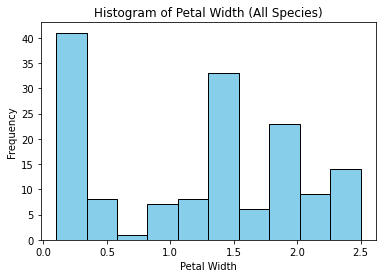

In [55]:
plt.figure()
plt.hist(df["petal_width"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of Petal Width (All Species)")
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.show()

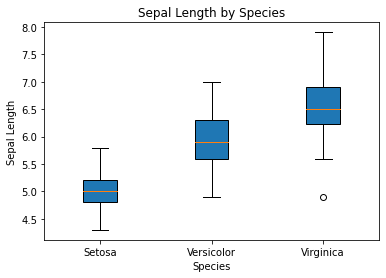

In [56]:
plt.figure()
plt.boxplot(data, labels=["Setosa", "Versicolor", "Virginica"], patch_artist=True)
plt.title("Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()


**Which plot better shows between-species differences, and why? <br>
Boxplot, because it compares medians, spread, and outliers across species directly.**

### 4. Distributions & Skewness

In [58]:
skewness = df.groupby("species")["petal_length"].apply(stats.skew)
print(skewness)

species
setosa        0.103175
versicolor   -0.588159
virginica     0.532822
Name: petal_length, dtype: float64


In [59]:
most_pos = skewness.idxmax()
most_neg = skewness.idxmin()

print("\nMost positively skewed species:", most_pos)
print("Most negatively skewed species:", most_neg)


Most positively skewed species: virginica
Most negatively skewed species: versicolor


**Interpretation: <br>
Virginica has a few unusually large petal lengths, making it left-skewed. <br>
Versicolor has slightly more small petal lengths, making it left-skewed.**

### 5. Sampling & Central Limit Theorem

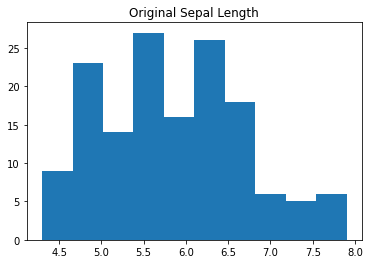

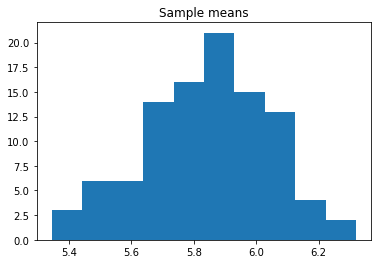

In [62]:
np.random.seed(42)
sample_means = [df["sepal_length"].sample(20, replace=True).mean() for i in range(100)]

plt.hist(df["sepal_length"])
plt.title("Original Sepal Length")
plt.show()

plt.hist(sample_means)
plt.title("Sample means")
plt.show()


**Interpretation: <br>
Sample means are more normally distributed.**

### 6. Correlation

In [72]:
r, p_value = stats.pearsonr(df["sepal_length"], df["petal_length"])
print("Pearson correlation (r):", r)


Pearson correlation (r): 0.8717537758865832


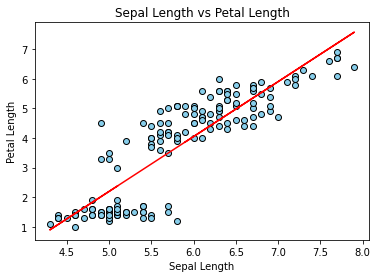

In [68]:
plt.figure()
plt.scatter(df["sepal_length"], df["petal_length"], color='skyblue', edgecolor='black')
m, b = np.polyfit(df["sepal_length"], df["petal_length"], 1)
plt.plot(df["sepal_length"], m*df["sepal_length"] + b, color='red')
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

**Interpretation: <br>
Pearson correlation (r): 0.872<br>
Relationship: positive (as the correlation is more than 0)<br>
Interpretation: As sepal length increases, petal length also increases.**

### 7. Hypothesis Testing: t-Test (2 Groups)

In [70]:
setosa = df[df["species"] == "setosa"]["petal_length"]
versicolor = df[df["species"] == "versicolor"]["petal_length"]

t_stat, p_value = stats.ttest_ind(setosa, versicolor)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -39.492719391538095
p-value: 5.404910513441677e-62


**Conclusion:<br>
Setosa and Versicolor have significantly different mean petal lengths; therefore, we reject the null hypothesis.**

### 8. Hypothesis Testing: ANOVA (3 Groups)

In [71]:
pw_setosa = df[df["species"] == "setosa"]["petal_width"]
pw_versicolor = df[df["species"] == "versicolor"]["petal_width"]
pw_virginica = df[df["species"] == "virginica"]["petal_width"]

f_stat, p_value = stats.f_oneway(pw_setosa, pw_versicolor, pw_virginica)
print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 960.007146801809
p-value: 4.169445839443116e-85


**Conclusion:<br>
Petal width differs significantly across Setosa, Versicolor, and Virginica; reject null hypothesis.**